In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv(r"D:\Practice\day13\housing.csv")

In [18]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
df.shape

(20640, 10)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [22]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [23]:
df.fillna(df.median(numeric_only=True), inplace=True)


In [24]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

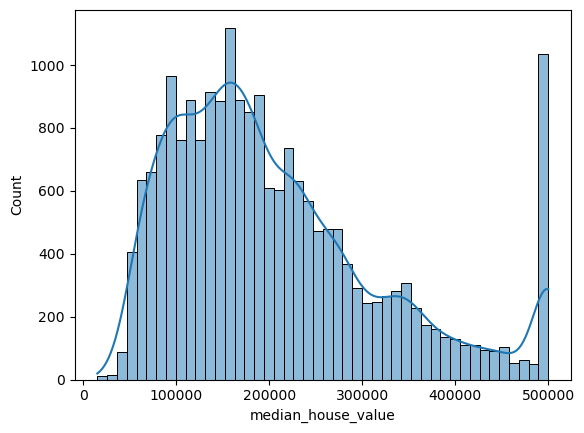

In [25]:
sns.histplot(df['median_house_value'], kde=True)
plt.show()


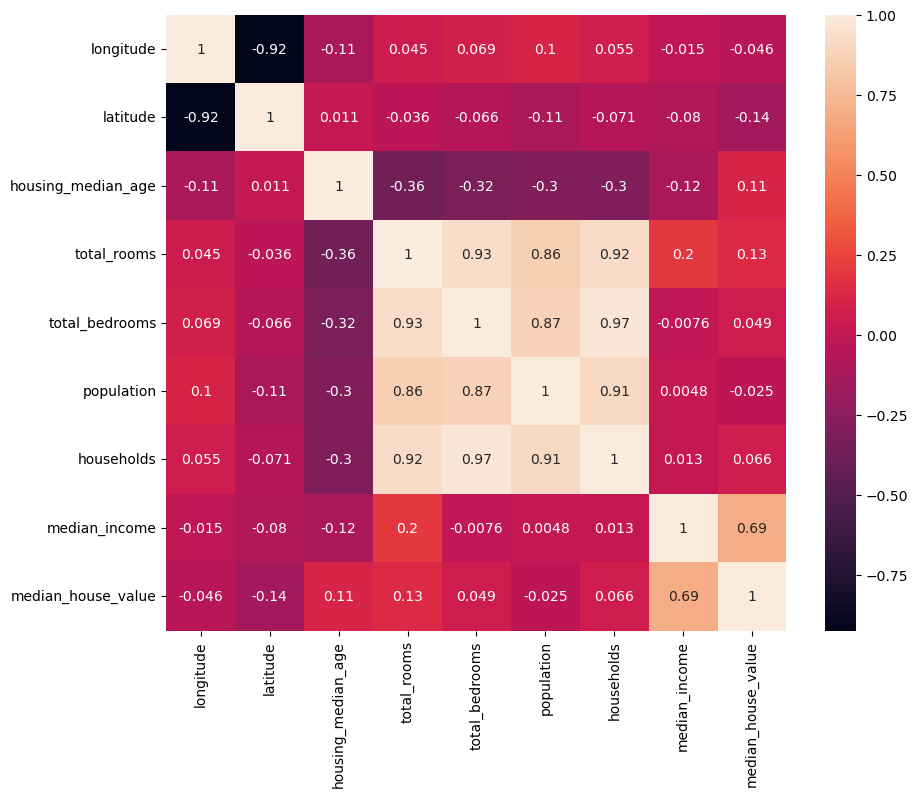

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()


In [27]:
df['ocean_proximity'].unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [43]:
df = pd.get_dummies(df, drop_first=True)


In [44]:
X = df['median_house_value']
y = df['median_house_value']


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["housing_median_age"] = scaler.fit_transform(df[["housing_median_age"]])
df["total_rooms"] = scaler.fit_transform(df[["total_rooms"]])
df["total_bedrooms"] = scaler.fit_transform(df[["total_bedrooms"]])
df["population"] = scaler.fit_transform(df[["population"]])
df["households"] = scaler.fit_transform(df[["households"]])
df["median_income"] = scaler.fit_transform(df[["median_income"]])
df["median_house_value"] = scaler.fit_transform(df[["median_house_value"]])

In [46]:
X = df[["housing_median_age", "total_rooms", "total_bedrooms", "population", "households",	"median_income"]]
y = df["median_house_value"]

In [47]:
X.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766
1,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238
2,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699
3,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968
4,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881


In [48]:
X.shape , y.shape

((20640, 6), (20640,))

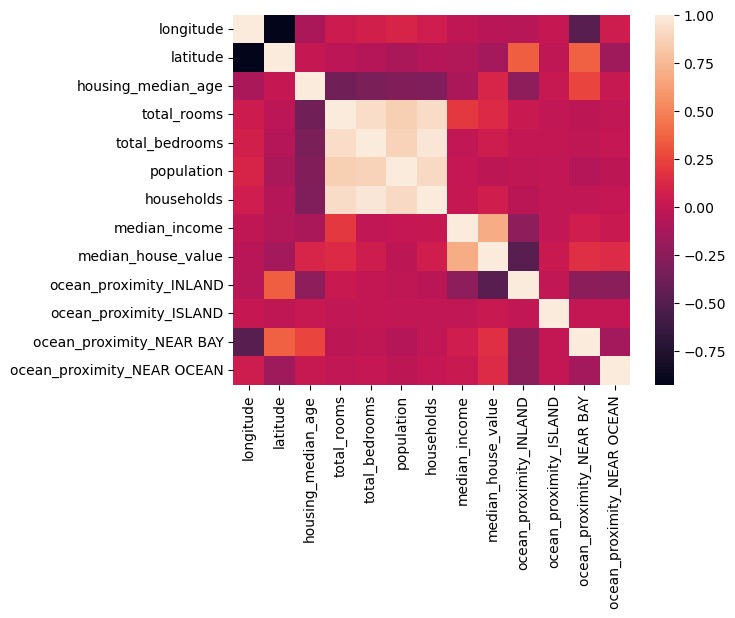

In [49]:
sns.heatmap(df.corr())
plt.show()


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test, y_train,y_test = train_test_split (X,y, test_size=0.2, random_state=42)

In [52]:
X_train.shape , X_test.shape

((16512, 6), (4128, 6))

In [53]:
y_train.shape , y_test.shape

((16512,), (4128,))

In [75]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error , r2_score

In [56]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
model.intercept_ , model.coef_

(np.float64(-0.001314560268577181),
 array([ 0.20689504, -0.3781639 ,  0.37049673, -0.34987729,  0.42087675,
         0.78957398]))

In [69]:
predicted_val = model.predict(X_test)

In [70]:
predicted_val

array([-1.00944662, -0.62896554,  0.46928679, ...,  1.93756317,
       -0.3385869 , -0.3757613 ], shape=(4128,))

In [76]:
mean_squared_error(y_test , predicted_val)*100

44.8263376422501

In [77]:
r2_score(y_test , predicted_val)

0.5445046216087992